<a href="https://colab.research.google.com/github/Pinlinzz/Analisis-Dataset-Employee-Salary-Analysis-/blob/main/Analisis_Dataset_Employee_Salary_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INISIASI DAN IMPORTING DATASET


Let's check the structure and summary of the R data frame, similar to `df.info()` and `df.describe()` in Python.

In [ ]:
# Instal library yang bakal dipakai
if(!require(ggplot2)) install.packages("ggplot2")
if(!require(dplyr)) install.packages("dplyr")
if(!require(ggcorrplot)) install.packages("ggcorrplot")
if(!require(moments)) install.packages("moments")

# Load library
library(ggplot2)
library(dplyr)
library(ggcorrplot)
library(moments)


# Data Cleaning Singkat (Memastikan tipe data benar)
salary_df$Gender <- as.factor(salary_df$Gender)
salary_df$Education <- factor(salary_df$Education, levels = c("High School", "Bachelor", "Master", "PhD"))
salary_df$Country <- as.factor(salary_df$Country)
salary_df$Department <- as.factor(salary_df$Department)

# Cek struktur data
str(salary_df)

'data.frame':	1200 obs. of  17 variables:
 $ Employee_ID        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Name               : chr  "Employee_1" "Employee_2" "Employee_3" "Employee_4" ...
 $ Age                : int  58 48 34 27 40 58 38 42 30 30 ...
 $ Gender             : Factor w/ 2 levels "Female","Male": 1 1 2 2 2 1 2 1 1 2 ...
 $ Country            : Factor w/ 5 levels "Canada","India",..: 2 4 5 4 1 2 4 5 4 3 ...
 $ City               : chr  "NY" "NY" "London" "Karachi" ...
 $ Education          : Factor w/ 4 levels "High School",..: 2 1 1 2 3 4 4 1 3 2 ...
 $ Job_Title          : chr  "Manager" "Designer" "Manager" "Developer" ...
 $ Department         : Factor w/ 4 levels "Finance","HR",..: 3 2 3 4 3 4 3 2 3 2 ...
 $ Experience_Years   : int  0 4 1 19 2 18 17 28 21 17 ...
 $ Salary_USD         : int  130735 54363 76694 31582 109910 96844 51301 104329 31620 92224 ...
 $ Bonus_USD          : int  3650 14600 15317 19768 18193 16563 7895 18543 2531 6481 ...
 $ Work_Hours_Per_Week: int  41

In [ ]:
# Load the dataset into an R data frame
salary_df <- read.csv('/content/dataset/Salary_Dataset.csv')

# Display the first 5 rows of the data frame
summary(salary_df)

  Employee_ID         Name                Age           Gender         
 Min.   :   1.0   Length:1200        Min.   :20.00   Length:1200       
 1st Qu.: 300.8   Class :character   1st Qu.:30.00   Class :character  
 Median : 600.5   Mode  :character   Median :41.00   Mode  :character  
 Mean   : 600.5                      Mean   :39.99                     
 3rd Qu.: 900.2                      3rd Qu.:50.00                     
 Max.   :1200.0                      Max.   :59.00                     
   Country              City            Education          Job_Title        
 Length:1200        Length:1200        Length:1200        Length:1200       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                  

# Data Cleaning & Preprocessing


In [ ]:
# --- 1. Data Cleaning & Preprocessing ---

# Fungsi untuk menghitung Modus (nilai yang paling sering muncul)
get_mode <- function(v) {
  uniqv <- unique(v)
  uniqv[which.max(tabulate(match(v, uniqv)))]
}

# Mengecek jumlah missing value sebelum cleaning
cat("Missing values before cleaning:\n")
print(colSums(is.na(salary_df)))

# Loop untuk membersihkan data (Imputasi)
# Jika kolom numerik -> isi dengan Median
# Jika kolom kategori -> isi dengan Modus
for (col_name in names(salary_df)) {
  if (any(is.na(salary_df[[col_name]]))) {
    if (is.numeric(salary_df[[col_name]])) {
      median_val <- median(salary_df[[col_name]], na.rm = TRUE)
      salary_df[[col_name]][is.na(salary_df[[col_name]])] <- median_val
    } else {
      mode_val <- get_mode(salary_df[[col_name]][!is.na(salary_df[[col_name]])])
      salary_df[[col_name]][is.na(salary_df[[col_name]])] <- mode_val
    }
  }
}

cat("\nData cleaning complete. Missing values after cleaning:\n")
print(colSums(is.na(salary_df)))

Missing values before cleaning:
        Employee_ID                Name                 Age              Gender 
                  0                   0                   0                   0 
            Country                City           Education           Job_Title 
                  0                   0                   0                   0 
         Department    Experience_Years          Salary_USD           Bonus_USD 
                  0                   0                   0                   0 
Work_Hours_Per_Week         Remote_Work   Performance_Score        Joining_Year 
                  0                   0                   0                   0 
      Contract_Type 
                  0 

Data cleaning complete. Missing values after cleaning:
        Employee_ID                Name                 Age              Gender 
                  0                   0                   0                   0 
            Country                City           Education 

# Data Explanatory ~ Matrix Correlation


In [ ]:
# --- 2. Exploratory Data Analysis ---

# Daftar kolom kategori yang ingin dianalisis
categorical_cols <- c('Gender', 'Country', 'City', 'Education', 'Job_Title', 'Department', 'Remote_Work', 'Contract_Type')

# Loop untuk menampilkan Value Counts
for (col in categorical_cols) {
  cat(paste0("\nValue counts for ", col, ":\n"))

  # Membuat tabel frekuensi dan mengurutkannya dari yang terbanyak (descending)
  counts <- sort(table(salary_df[[col]]), decreasing = TRUE)

  # Menampilkan hasil
  print(counts)
}

# --- Correlation Matrix ---

# Mengambil hanya kolom numerik
numeric_cols <- sapply(salary_df, is.numeric)
numeric_df <- salary_df[, numeric_cols]

# Menghitung matriks korelasi
# 'use = "complete.obs"' memastikan tidak error jika ada sisa missing value
corr_matrix <- cor(numeric_df, use = "complete.obs")

cat("\nCorrelation Matrix:\n")
print(round(corr_matrix, 6)) # Membulatkan ke 6 desimal agar rapi seperti contoh


Value counts for Gender:

  Male Female 
   604    596 

Value counts for Country:

   India Pakistan      USA   Canada       UK 
     266      247      237      234      216 

Value counts for City:

     NY  London   Delhi Karachi      LA Toronto 
    226     202     200     193     192     187 

Value counts for Education:

        PhD      Master    Bachelor High School 
        321         309         293         277 

Value counts for Job_Title:

  Analyst  Designer   Manager Developer 
      322       303       299       276 

Value counts for Department:

       HR        IT Marketing   Finance 
      328       303       286       283 

Value counts for Remote_Work:

Yes  No 
625 575 

Value counts for Contract_Type:

Part-Time  Contract Full-Time 
      417       406       377 

Correlation Matrix:
                    Employee_ID       Age Experience_Years Salary_USD Bonus_USD
Employee_ID            1.000000 -0.008070        -0.021545   0.021926 -0.029867
Age                 

#Pearson Corelation Heatmap


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


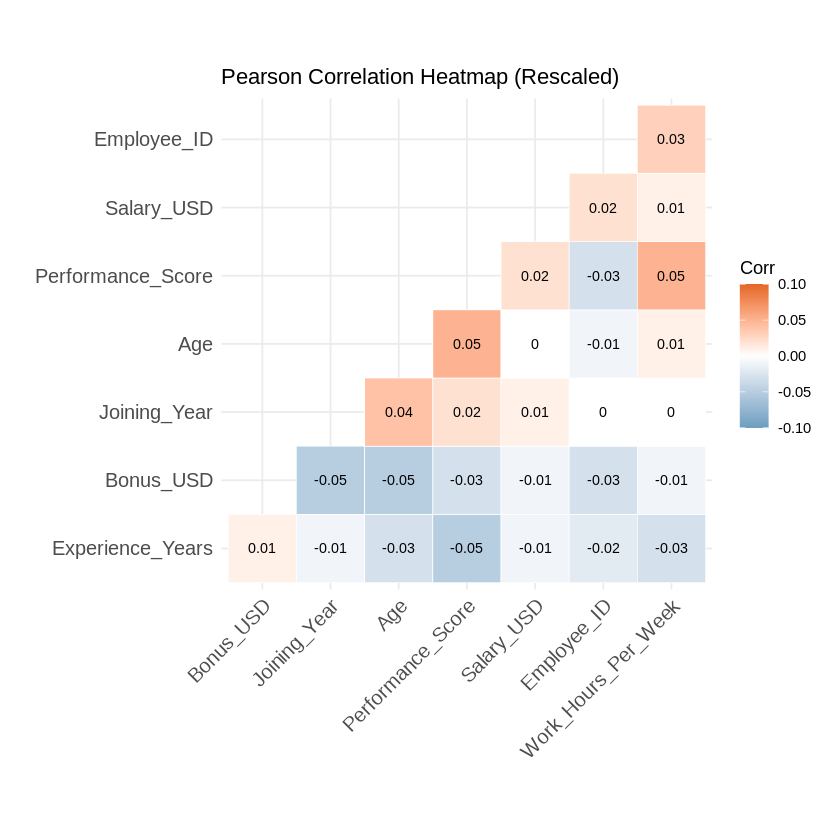

In [ ]:
# Load library yang dibutuhkan
if (!require(ggcorrplot)) {
  install.packages("ggcorrplot")
  library(ggcorrplot)
}
library(ggcorrplot)
library(ggplot2)

# Pastikan matriks korelasi sudah ada (dari langkah sebelumnya)
# numeric_df <- salary_df[sapply(salary_df, is.numeric)]
# corr_matrix <- cor(numeric_df, method = "pearson", use = "complete.obs")

# Membuat Plot dengan Skala yang Disesuaikan
ggcorrplot(corr_matrix,
           hc.order = TRUE,
           type = "lower",
           lab = TRUE,
           lab_size = 3,
           title = "Pearson Correlation Heatmap (Rescaled)",
           outline.color = "white",
           ggtheme = ggplot2::theme_minimal()) +
  # --- BAGIAN INI YANG MEMAKSA WARNA MUNCUL ---
  # Kita ubah limit dari c(-1, 1) menjadi c(-0.1, 0.1)
  # Artinya: Angka 0.1 sudah dianggap "Sangat Oranye"
  scale_fill_gradient2(low = "#6D9EC1", mid = "white", high = "#E46726",
                       midpoint = 0, limit = c(-0.1, 0.1), name = "Corr")

# UJI HIPOTESIS

## Uji Hipotesis 1: Pengaruh Pengalaman Kerja vs Gaji


	Pearson's product-moment correlation

data:  salary_df$Experience_Years and salary_df$Salary_USD
t = -0.2003, df = 1198, p-value = 0.8413
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.06235601  0.05081945
sample estimates:
         cor 
-0.005786815 




Call:
lm(formula = Salary_USD ~ Experience_Years, data = salary_df)

Residuals:
   Min     1Q Median     3Q    Max 
-59655 -31063   -683  31350  60320 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      90130.29    1971.77   45.71   <2e-16 ***
Experience_Years   -23.55     117.56   -0.20    0.841    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 35340 on 1198 degrees of freedom
Multiple R-squared:  3.349e-05,	Adjusted R-squared:  -0.0008012 
F-statistic: 0.04012 on 1 and 1198 DF,  p-value: 0.8413


`geom_smooth()` using formula = 'y ~ x'


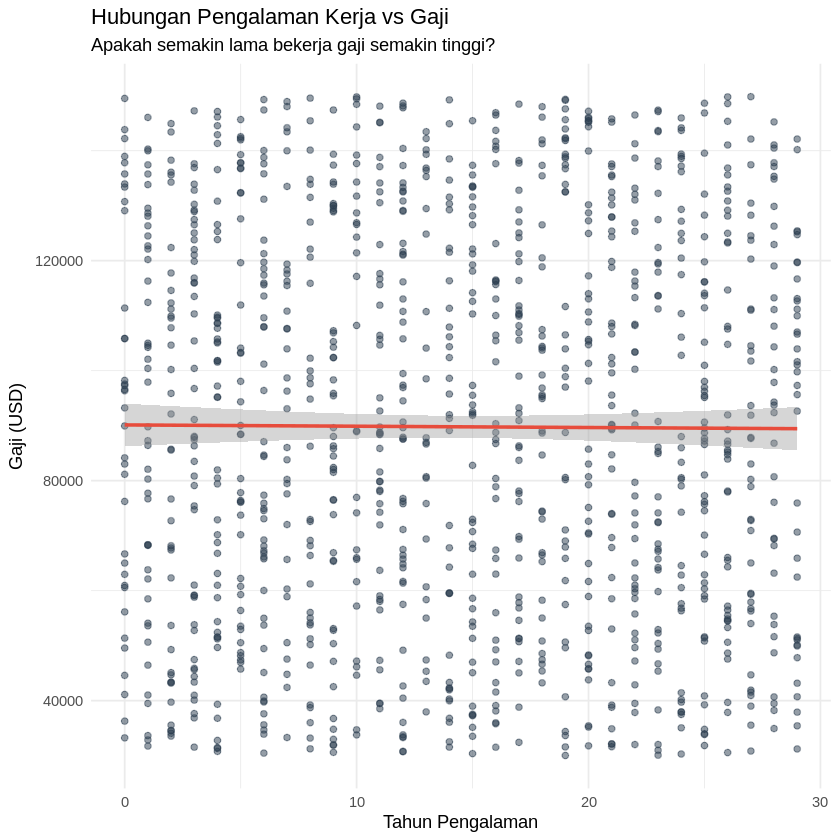

In [ ]:
# --- Uji Hipotesis 1: Pengalaman Kerja vs Gaji ---

# 1. Uji Korelasi Pearson (untuk melihat kekuatan hubungan)
cor_test_exp <- cor.test(salary_df$Experience_Years, salary_df$Salary_USD, method = "pearson")
print(cor_test_exp)

# 2. Analisis Regresi Linear (untuk melihat pengaruh/slope)
lm_exp <- lm(Salary_USD ~ Experience_Years, data = salary_df)
summary(lm_exp)

# 3. Visualisasi Scatter Plot dengan Garis Regresi
library(ggplot2)
ggplot(salary_df, aes(x = Experience_Years, y = Salary_USD)) +
  geom_point(alpha = 0.5, color = "#2c3e50") +
  geom_smooth(method = "lm", color = "#e74c3c", se = TRUE) +
  labs(title = "Hubungan Pengalaman Kerja vs Gaji",
       subtitle = "Apakah semakin lama bekerja gaji semakin tinggi?",
       x = "Tahun Pengalaman",
       y = "Gaji (USD)") +
  theme_minimal()

## Uji Hipotesis 2: Pendidikan vs Gaji



              Df    Sum Sq   Mean Sq F value Pr(>F)
Education      3 4.767e+09 1.589e+09   1.274  0.282
Residuals   1196 1.491e+12 1.247e+09               

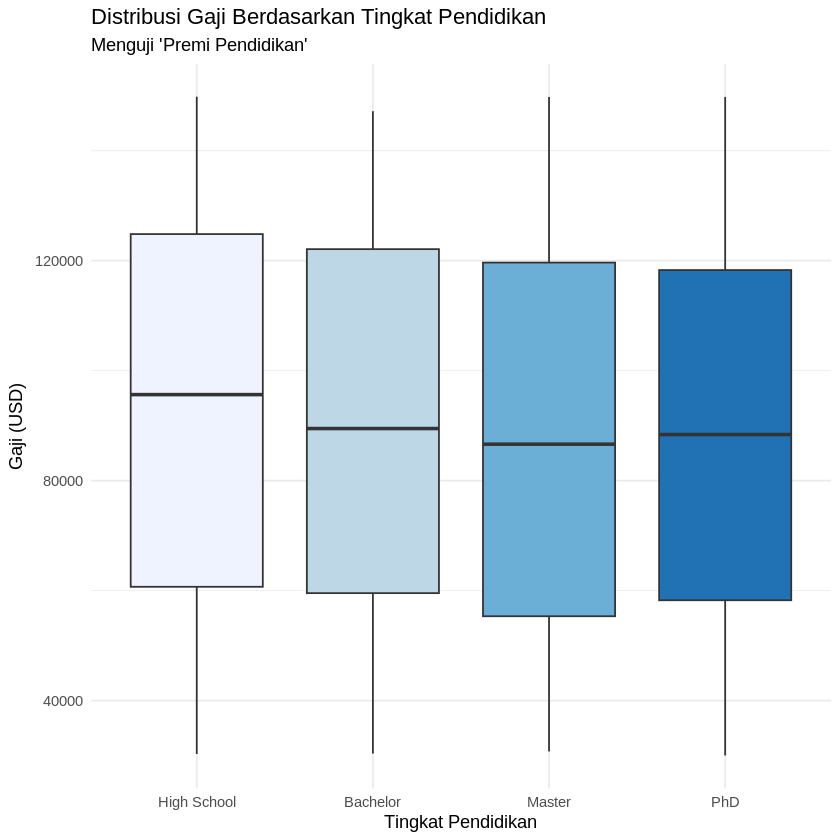

In [ ]:
# --- Uji Hipotesis 2: Pendidikan vs Gaji ---

# Mengurutkan level pendidikan secara logis (bukan abjad)
salary_df$Education <- factor(salary_df$Education,
                              levels = c("High School", "Bachelor", "Master", "PhD"))

# 1. Melakukan Uji ANOVA
anova_edu <- aov(Salary_USD ~ Education, data = salary_df)
summary(anova_edu)

# 2. Visualisasi Boxplot untuk membandingkan distribusi
ggplot(salary_df, aes(x = Education, y = Salary_USD, fill = Education)) +
  geom_boxplot() +
  labs(title = "Distribusi Gaji Berdasarkan Tingkat Pendidikan",
       subtitle = "Menguji 'Premi Pendidikan'",
       x = "Tingkat Pendidikan",
       y = "Gaji (USD)") +
  theme_minimal() +
  scale_fill_brewer(palette = "Blues") +
  theme(legend.position = "none")

## Uji Hipotesis 3: Gender Pay Gap


	Welch Two Sample t-test

data:  Salary_USD by Gender
t = -1.1261, df = 1195.4, p-value = 0.2603
alternative hypothesis: true difference in means between group Female and group Male is not equal to 0
95 percent confidence interval:
 -6298.662  1704.832
sample estimates:
mean in group Female   mean in group Male 
            88636.19             90933.11 



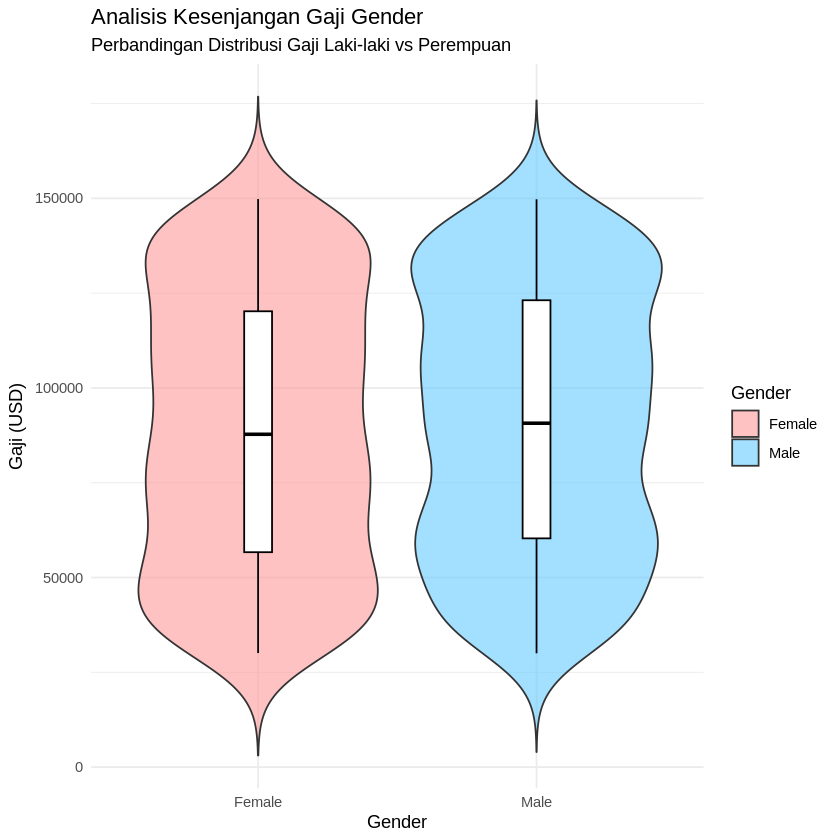

In [ ]:
# --- Uji Hipotesis 3: Gender Pay Gap ---

# 1. Melakukan T-Test (Two-sample t-test)
t_test_gender <- t.test(Salary_USD ~ Gender, data = salary_df)
print(t_test_gender)

# 2. Visualisasi Violin Plot (kombinasi Boxplot & kepadatan data)
ggplot(salary_df, aes(x = Gender, y = Salary_USD, fill = Gender)) +
  geom_violin(trim = FALSE, alpha = 0.6) +
  geom_boxplot(width = 0.1, fill = "white", color = "black") +
  labs(title = "Analisis Kesenjangan Gaji Gender",
       subtitle = "Perbandingan Distribusi Gaji Laki-laki vs Perempuan",
       x = "Gender",
       y = "Gaji (USD)") +
  theme_minimal() +
  scale_fill_manual(values = c("#FF9999", "#66CCFF")) # Warna Pink & Biru

##  Uji Hipotesis 4: Negara vs Gaji

              Df    Sum Sq   Mean Sq F value Pr(>F)
Country        4 2.990e+09 7.476e+08   0.598  0.664
Residuals   1195 1.493e+12 1.249e+09               

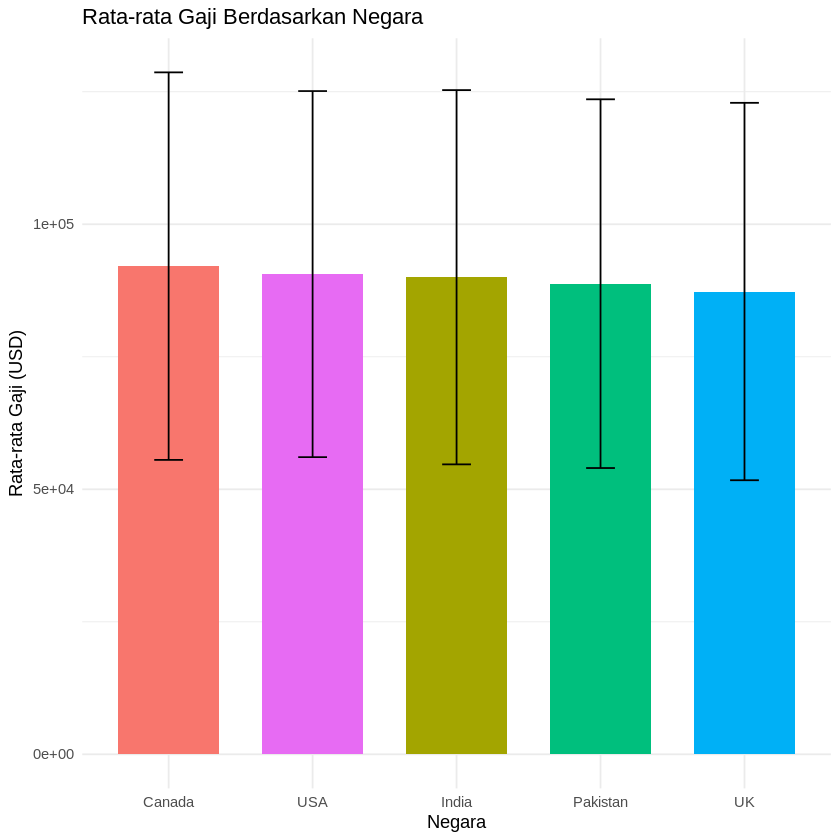

In [ ]:
# --- Uji Hipotesis 4: Negara vs Gaji ---

# 1. Melakukan Uji ANOVA
anova_country <- aov(Salary_USD ~ Country, data = salary_df)
summary(anova_country)

# Jika ANOVA menunjukkan hasil signifikan (Pr(>F) < 0.05),
# kita bisa cek negara mana yang beda menggunakan TukeyHSD:
# TukeyHSD(anova_country)

# 2. Visualisasi Bar Plot (Rata-rata Gaji per Negara)
# Kita hitung dulu rata-rata per negara agar plot lebih informatif
library(dplyr)
avg_salary_country <- salary_df %>%
  group_by(Country) %>%
  summarise(Mean_Salary = mean(Salary_USD),
            SD_Salary = sd(Salary_USD)) # Standar Deviasi untuk Error Bar

ggplot(avg_salary_country, aes(x = reorder(Country, -Mean_Salary), y = Mean_Salary, fill = Country)) +
  geom_bar(stat = "identity", width = 0.7) +
  geom_errorbar(aes(ymin = Mean_Salary - SD_Salary, ymax = Mean_Salary + SD_Salary), width = 0.2) +
  labs(title = "Rata-rata Gaji Berdasarkan Negara",
       x = "Negara",
       y = "Rata-rata Gaji (USD)") +
  theme_minimal() +
  theme(legend.position = "none")

# JAWAB TUJUAN PENELITIAN


## TUJUAN 1 Analisis Hubungan: Pengalaman Kerja vs Gaji


	Pearson's product-moment correlation

data:  salary_df$Experience_Years and salary_df$Salary_USD
t = -0.2003, df = 1198, p-value = 0.8413
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.06235601  0.05081945
sample estimates:
         cor 
-0.005786815 




Call:
lm(formula = Salary_USD ~ Experience_Years, data = salary_df)

Residuals:
   Min     1Q Median     3Q    Max 
-59655 -31063   -683  31350  60320 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      90130.29    1971.77   45.71   <2e-16 ***
Experience_Years   -23.55     117.56   -0.20    0.841    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 35340 on 1198 degrees of freedom
Multiple R-squared:  3.349e-05,	Adjusted R-squared:  -0.0008012 
F-statistic: 0.04012 on 1 and 1198 DF,  p-value: 0.8413


`geom_smooth()` using formula = 'y ~ x'


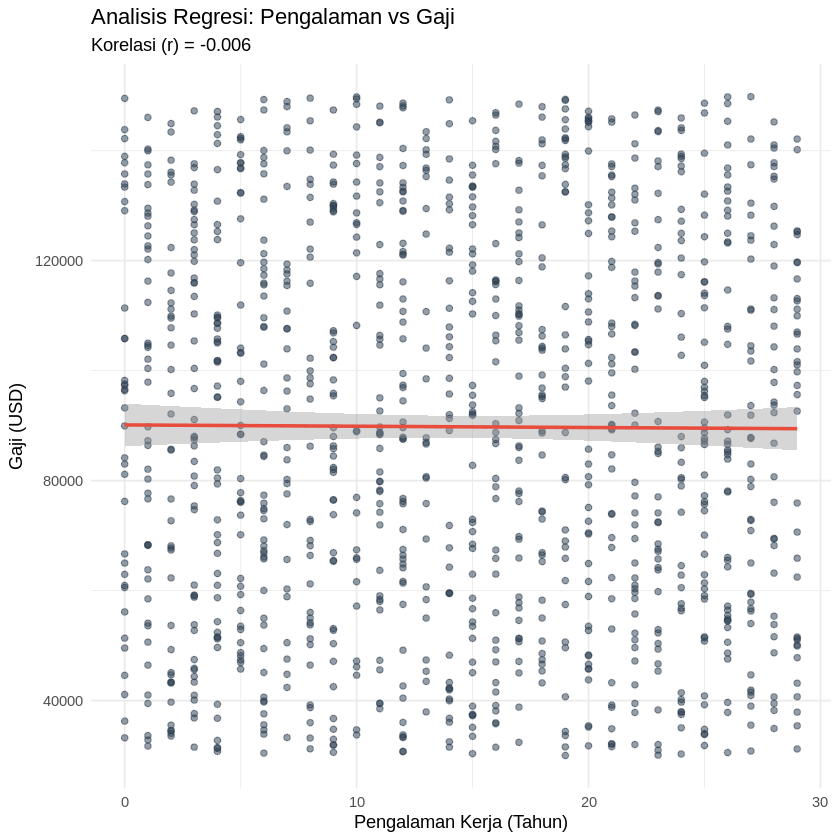

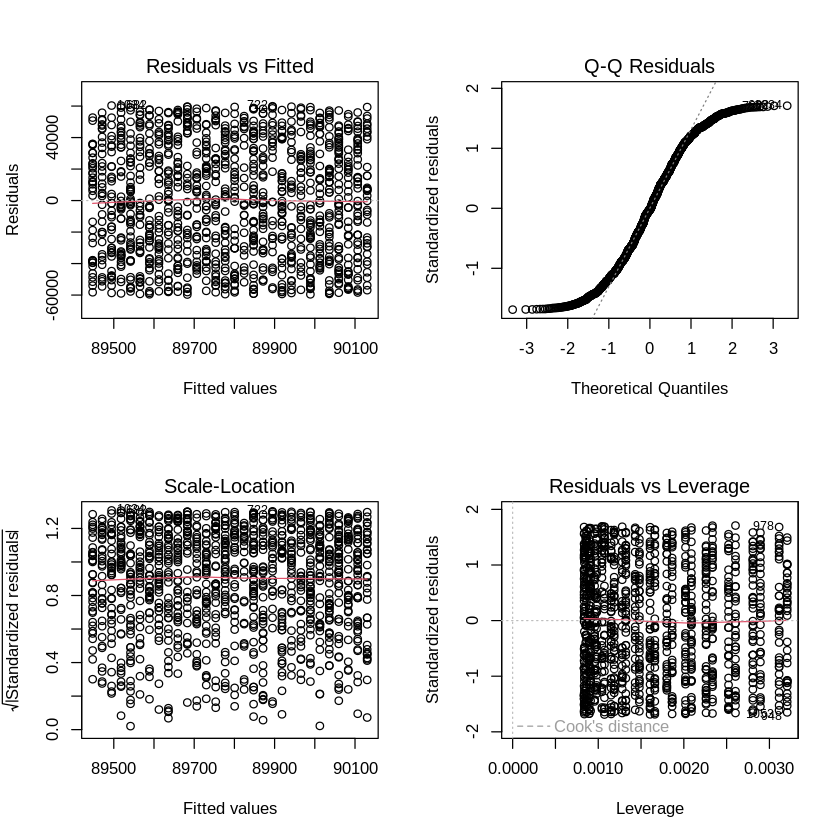

In [ ]:
# --- C.1. Simple Linear Regression & Correlation ---

# 1. Uji Korelasi Pearson
cor_test <- cor.test(salary_df$Experience_Years, salary_df$Salary_USD, method = "pearson")
print(cor_test)

# 2. Model Regresi Linear
# Model: Gaji = beta0 + beta1 * Pengalaman
model_reg <- lm(Salary_USD ~ Experience_Years, data = salary_df)
summary(model_reg)

# 3. Visualisasi Scatterplot dengan Garis Regresi
plot_reg <- ggplot(salary_df, aes(x = Experience_Years, y = Salary_USD)) +
  geom_point(alpha = 0.5, color = "#2c3e50") +
  geom_smooth(method = "lm", color = "#e74c3c", se = TRUE) +
  labs(title = "Analisis Regresi: Pengalaman vs Gaji",
       subtitle = paste("Korelasi (r) =", round(cor_test$estimate, 3)),
       x = "Pengalaman Kerja (Tahun)",
       y = "Gaji (USD)") +
  theme_minimal()

print(plot_reg)

# 4. Analisis Residual (Opsional tapi bagus untuk validitas model)
par(mfrow = c(2, 2))
plot(model_reg)
par(mfrow = c(1, 1)) # Reset layout

## TUJUAN 2 Analisis Komparatif: Gender Pay Gap
Menguji apakah ada perbedaan gaji yang signifikan antara Laki-laki dan Perempuan.


	Welch Two Sample t-test

data:  Salary_USD by Gender
t = -1.1261, df = 1195.4, p-value = 0.2603
alternative hypothesis: true difference in means between group Female and group Male is not equal to 0
95 percent confidence interval:
 -6298.662  1704.832
sample estimates:
mean in group Female   mean in group Male 
            88636.19             90933.11 



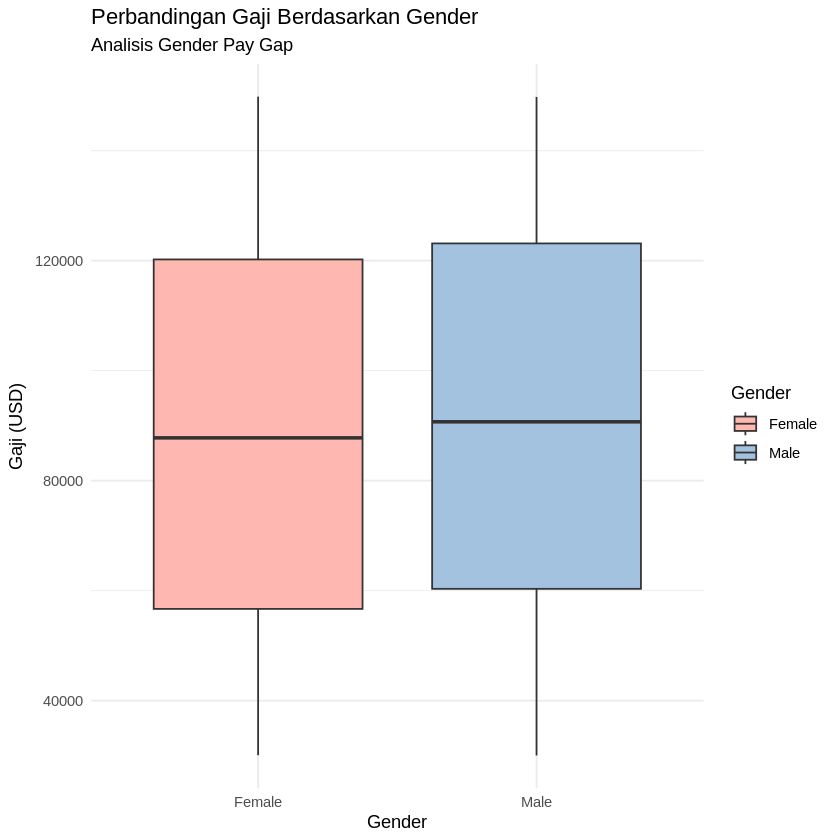

In [ ]:
# --- C.2. Uji Beda Dua Rata-rata (Gender) ---

# Opsi 1: Independent t-Test (Jika data Normal)
t_test_gender <- t.test(Salary_USD ~ Gender, data = salary_df, var.equal = FALSE)
print(t_test_gender)

# Opsi 2: Mann-Whitney U Test (Jika data TIDAK Normal)
# wilcox_gender <- wilcox.test(Salary_USD ~ Gender, data = salary_df)
# print(wilcox_gender)

# Visualisasi Boxplot Gender
plot_gender <- ggplot(salary_df, aes(x = Gender, y = Salary_USD, fill = Gender)) +
  geom_boxplot() +
  labs(title = "Perbandingan Gaji Berdasarkan Gender",
       subtitle = "Analisis Gender Pay Gap",
       x = "Gender",
       y = "Gaji (USD)") +
  theme_minimal() +
  scale_fill_manual(values = c("#ffb7b2", "#a2c2e0"))

print(plot_gender)

## TUJUAN 3 Analisis Komparatif: Tingkat Pendidikan
Membandingkan gaji antar jenjang pendidikan

              Df    Sum Sq   Mean Sq F value Pr(>F)
Education      3 4.767e+09 1.589e+09   1.274  0.282
Residuals   1196 1.491e+12 1.247e+09               


	Kruskal-Wallis rank sum test

data:  Salary_USD by Education
Kruskal-Wallis chi-squared = 3.73, df = 3, p-value = 0.2921



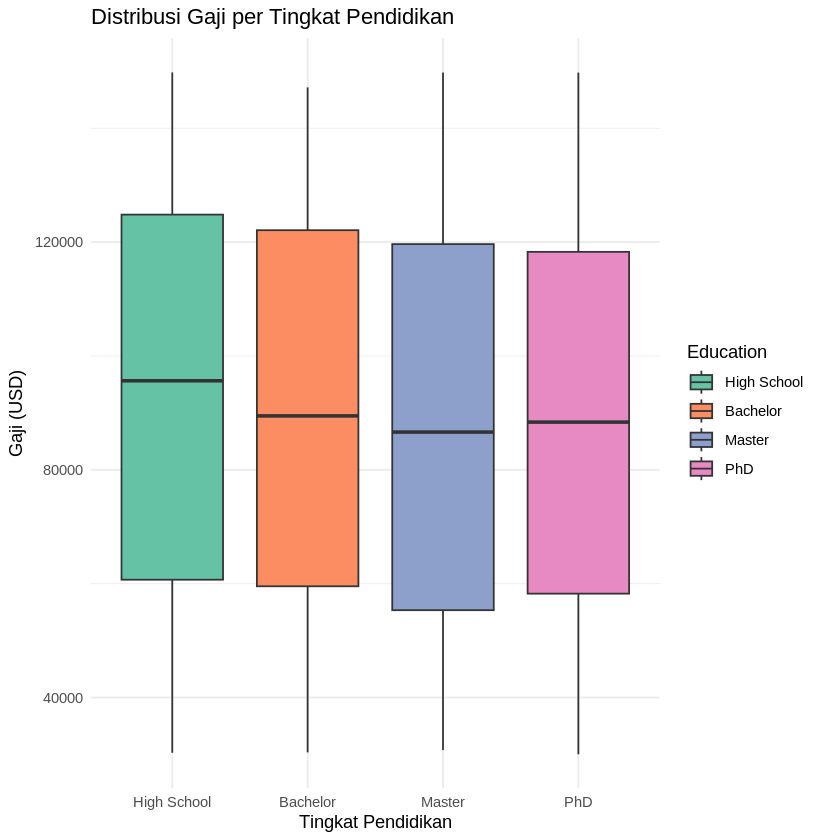

In [ ]:
# --- C.3. Uji Beda Rata-rata (Pendidikan) ---

# Opsi 1: One-Way ANOVA (Parametrik)
anova_edu <- aov(Salary_USD ~ Education, data = salary_df)
summary(anova_edu)

# Opsi 2: Kruskal-Wallis Test (Non-Parametrik)
kruskal_edu <- kruskal.test(Salary_USD ~ Education, data = salary_df)
print(kruskal_edu)

# Visualisasi Boxplot Pendidikan
plot_edu <- ggplot(salary_df, aes(x = Education, y = Salary_USD, fill = Education)) +
  geom_boxplot() +
  labs(title = "Distribusi Gaji per Tingkat Pendidikan",
       x = "Tingkat Pendidikan",
       y = "Gaji (USD)") +
  theme_minimal() +
  scale_fill_brewer(palette = "Set2")

print(plot_edu)

## TUJUAN 4 Analisis Komparatif: Lokasi Geografis (Negara)
Melihat apakah negara mempengaruhi besaran gaji.



	Kruskal-Wallis rank sum test

data:  Salary_USD by Country
Kruskal-Wallis chi-squared = 2.2827, df = 4, p-value = 0.6839



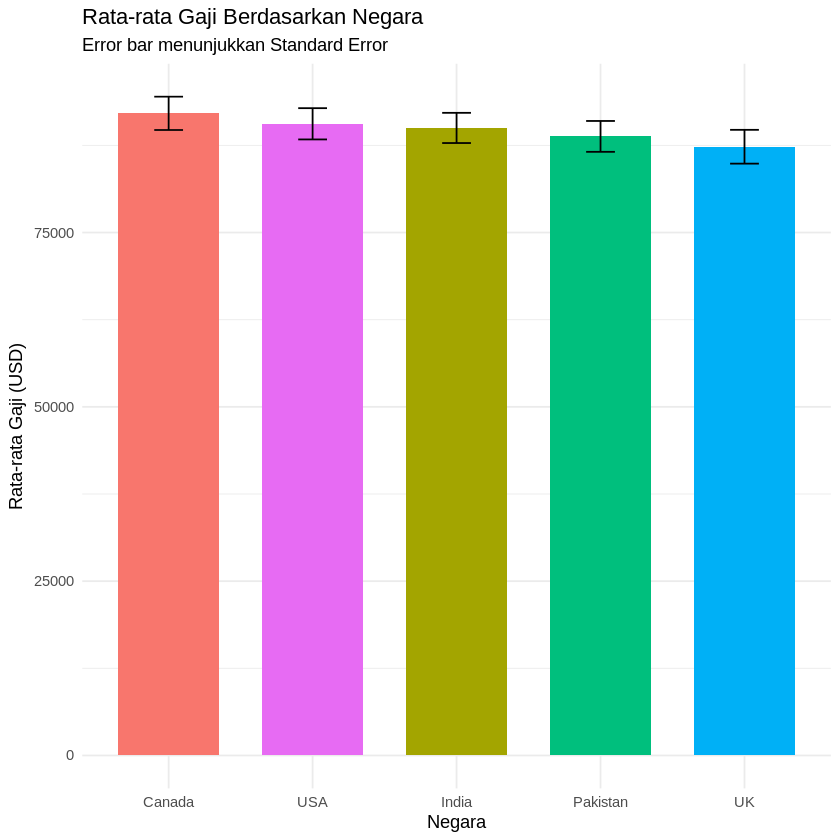

In [ ]:
# --- C.4. Analisis Berdasarkan Negara ---

# Menghitung Rata-rata Gaji per Negara untuk Plotting
country_summary <- salary_df %>%
  group_by(Country) %>%
  summarise(Mean_Salary = mean(Salary_USD),
            SE_Salary = sd(Salary_USD) / sqrt(n()))

# Uji Kruskal-Wallis (Aman untuk berbagai distribusi data)
kruskal_country <- kruskal.test(Salary_USD ~ Country, data = salary_df)
print(kruskal_country)

# Visualisasi Bar Plot dengan Error Bar
plot_country <- ggplot(country_summary, aes(x = reorder(Country, -Mean_Salary), y = Mean_Salary, fill = Country)) +
  geom_bar(stat = "identity", width = 0.7) +
  geom_errorbar(aes(ymin = Mean_Salary - SE_Salary, ymax = Mean_Salary + SE_Salary), width = 0.2) +
  labs(title = "Rata-rata Gaji Berdasarkan Negara",
       subtitle = "Error bar menunjukkan Standard Error",
       x = "Negara",
       y = "Rata-rata Gaji (USD)") +
  theme_minimal() +
  theme(legend.position = "none")

print(plot_country)

## TUJUAN 5 Analisis Asosiasi: Gender vs Departemen
Menguji independensi antara gender dan pemilihan departemen.


           
            Female Male
  Finance      145  138
  HR           167  161
  IT           140  163
  Marketing    144  142

	Pearson's Chi-squared test

data:  table_dept_gender
X-squared = 1.9895, df = 3, p-value = 0.5746



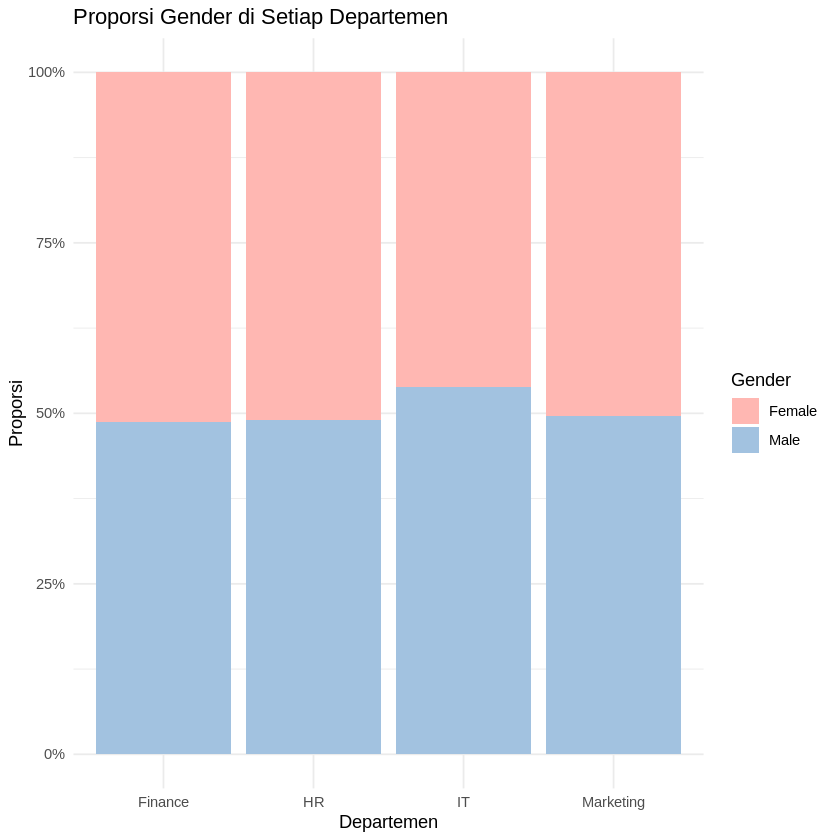

In [ ]:
# --- C.5. Chi-Square Test of Independence ---

# Membuat Tabel Kontingensi
table_dept_gender <- table(salary_df$Department, salary_df$Gender)
print(table_dept_gender)

# Melakukan Chi-Square Test
chisq_res <- chisq.test(table_dept_gender)
print(chisq_res)

# Visualisasi Stacked Bar Chart
plot_assoc <- ggplot(salary_df, aes(x = Department, fill = Gender)) +
  geom_bar(position = "fill") +
  labs(title = "Proporsi Gender di Setiap Departemen",
       x = "Departemen",
       y = "Proporsi",
       fill = "Gender") +
  scale_y_continuous(labels = scales::percent) +
  theme_minimal() +
  scale_fill_manual(values = c("#ffb7b2", "#a2c2e0"))

print(plot_assoc)

## ESTIMASI PARAMETER
Menghitung estimasi rata-rata gaji populasi

In [ ]:
# --- D. Confidence Interval ---

# Menghitung CI 95% untuk Mean Gaji
t_test_ci <- t.test(salary_df$Salary_USD, conf.level = 0.95)

cat("=== 95% Confidence Interval untuk Rata-rata Gaji ===\n")
cat("Lower Bound :", t_test_ci$conf.int[1], "\n")
cat("Upper Bound :", t_test_ci$conf.int[2], "\n")
cat("Mean Sample :", t_test_ci$estimate, "\n")

=== 95% Confidence Interval untuk Rata-rata Gaji ===
Lower Bound : 87791.71 
Upper Bound : 91792.91 
Mean Sample : 89792.31 
